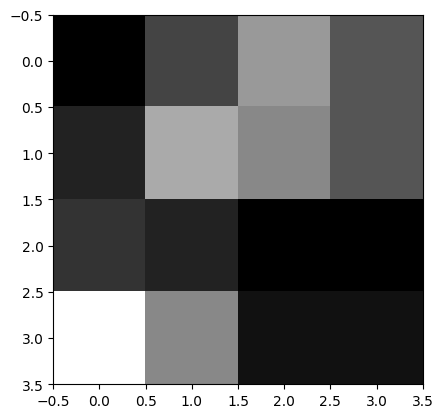

1/1 [==============================] - 0s 358ms/step
[[11 10]
 [16  2]]


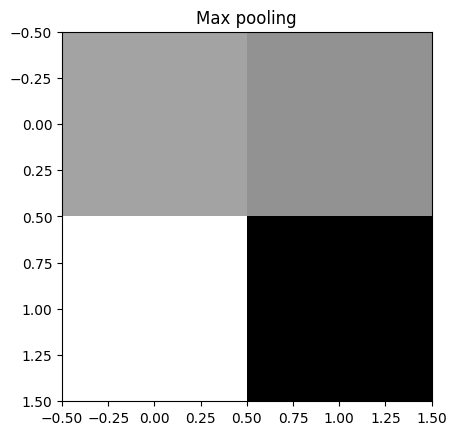

In [1]:
import numpy as np 
from keras.models import Sequential 
from keras.layers import MaxPooling2D  
import matplotlib.pyplot as plt
  
# define input image 
image = np.array([[1, 5, 10, 6], 
                  [3, 11, 9, 6], 
                  [4, 3, 1, 1], 
                  [16, 9 ,2 ,2]]) 

#for pictorial representation of the image
plt.imshow(image, cmap="gray")
plt.show()

image = image.reshape(1, 4, 4, 1) 
  
# define model that contains one average pooling layer 
model = Sequential( 
    [MaxPooling2D (pool_size = 2, strides = 2)]) 
  
# generate pooled output 
output = model.predict(image) 
  
# print output image matrix
output = np.squeeze(output) 
print(output) 

# print output image 
plt.imshow(output, cmap="gray")
plt.title('Max pooling')
plt.show()

### Explanation of Code Execution

1. **Define the Input Image**:
   - The input image is a 4x4 matrix with specific values, reshaped to the format `(1, 4, 4, 1)` to simulate a single grayscale image (1 channel).

2. **Visualize the Image**:
   - `plt.imshow(image, cmap="gray")` shows the input image in grayscale before applying max pooling.

3. **Max Pooling Layer Setup**:
   - A `MaxPooling2D` layer is defined in the model with:
     - `pool_size=(2, 2)`: The pooling window size is 2x2, meaning each 2x2 section of the image will be reduced to a single maximum value.
     - `strides=2`: The window moves two steps at a time, ensuring that non-overlapping regions are pooled.

4. **Pooling Operation**:
   - When the model processes the image, each 2x2 region is replaced by its maximum value:
     - Top-left 2x2 section (1, 5, 3, 11): Max = 11
     - Top-right 2x2 section (10, 6, 9, 6): Max = 10
     - Bottom-left 2x2 section (4, 3, 16, 9): Max = 16
     - Bottom-right 2x2 section (1, 1, 2, 2): Max = 2
   - The resulting 2x2 matrix after pooling is:
     ```
     [[11, 10],
      [16,  2]]
     ```

5. **Display Pooled Image**:
   - The pooled output is displayed, showing a simplified version of the original image that retains the most prominent features.

The `MaxPooling2D` layer effectively reduces spatial size while preserving key values, which helps reduce computation and focus on high-intensity areas of the image.

1/1 [==============================] - 1s 651ms/step


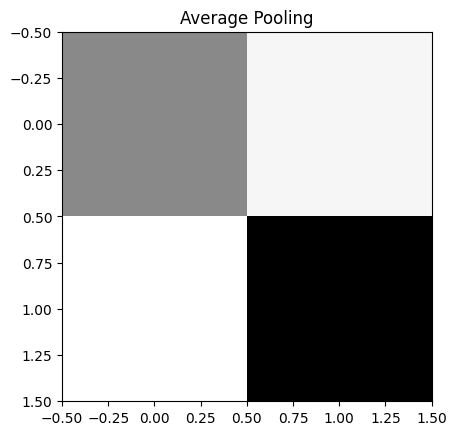

Average Pooling Output:
 [[5.   7.75]
 [8.   1.5 ]]


In [3]:
import numpy as np 
from keras.models import Sequential 
from keras.layers import AveragePooling2D  
import matplotlib.pyplot as plt
  
# Define input image 
image = np.array([[1, 5, 10, 6], 
                  [3, 11, 9, 6], 
                  [4, 3, 1, 1], 
                  [16, 9 ,2 ,2]], dtype=np.float32)  # Convert to float32

# Reshape for model input
image = image.reshape(1, 4, 4, 1) 

# Define model with AveragePooling2D
model = Sequential([AveragePooling2D(pool_size=2, strides=2)]) 

# Get output
output_avg = model.predict(image) 
output_avg = np.squeeze(output_avg) 

# Show output image
plt.imshow(output_avg, cmap="gray")
plt.title('Average Pooling')
plt.show()

print("Average Pooling Output:\n", output_avg)


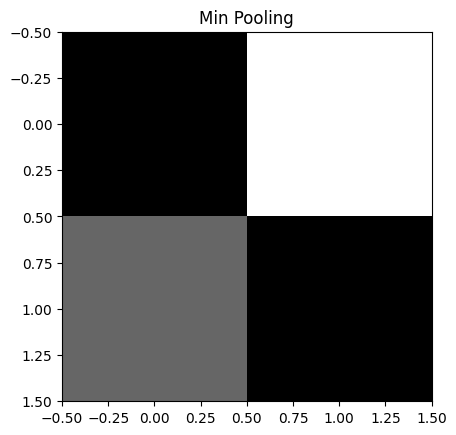

Min Pooling Output:
 [[1. 6.]
 [3. 1.]]


In [4]:
# Define a function for min pooling
def min_pooling(image, pool_size=2, stride=2):
    output_shape = (image.shape[0] // pool_size, image.shape[1] // pool_size)
    output = np.zeros(output_shape)

    for i in range(0, image.shape[0], stride):
        for j in range(0, image.shape[1], stride):
            output[i // stride, j // stride] = np.min(image[i:i+pool_size, j:j+pool_size])
    return output

# Apply min pooling
output_min = min_pooling(image.reshape(4, 4))  

# Show output image
plt.imshow(output_min, cmap="gray")
plt.title('Min Pooling')
plt.show()

print("Min Pooling Output:\n", output_min)


In [5]:
from keras.layers import GlobalAveragePooling2D

# Define model with GlobalAveragePooling2D
model = Sequential([GlobalAveragePooling2D()])  

# Apply to image
output_global_avg = model.predict(image)  

print("Global Average Pooling Output:", output_global_avg)


1/1 [==============================] - 0s 97ms/step
Global Average Pooling Output: [[5.5625]]
